In [77]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import datetime

In [78]:
def download_data(stock,start,end):
    data={}
    ticker = yf.download(stock,start,end)
    data['price'] = ticker['Adj Close']
    return pd.DataFrame(data)

In [90]:
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2020,1,1)
stock_data = download_data('IBM',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [91]:
stock_data['return'] = np.log(stock_data['price'] / stock_data['price'].shift(1))

In [92]:
stock_data['move'] = stock_data['price'] - stock_data['price'].shift(1)
stock_data['up'] =  np.where(stock_data['move'] > 0, stock_data['move'],0)
stock_data['down'] =  np.where(stock_data['move'] < 0, stock_data['move'],0)

In [93]:
stock_data['average_gain'] = stock_data['up'].rolling(14).mean()
stock_data['average_loss'] = stock_data['down'].abs().rolling(14).mean()
RS = stock_data['average_gain'] / stock_data['average_loss']

In [95]:
stock_data.dropna(inplace=True)

In [98]:
stock_data['RSI'] = 100 - (100 / (1.0+RS))
stock_data

,price,return,move,up,down,average_gain,average_loss,RSI
Date,,,,,,,,
2015-01-22,116.783226,0.021466,2.480118,2.480118,0.000000,0.552923,0.910983,37.770397
2015-01-23,117.143990,0.003084,0.360764,0.360764,0.000000,0.578692,0.910983,38.846862
2015-01-26,117.512238,0.003139,0.368248,0.368248,0.000000,0.604996,0.774093,43.869236
2015-01-27,115.490555,-0.017354,-2.021683,0.000000,-2.021683,0.604996,0.733833,45.188441
2015-01-28,113.897285,-0.013892,-1.593269,0.000000,-1.593269,0.604996,0.792885,43.279501
...,...,...,...,...,...,...,...,...
2019-12-24,123.739571,-0.004214,-0.522514,0.000000,-0.522514,0.329366,0.133580,71.145636
2019-12-26,123.675407,-0.000519,-0.064163,0.000000,-0.064163,0.329366,0.132924,71.246612
2019-12-27,124.005402,0.002665,0.329994,0.329994,0.000000,0.267159,0.132924,66.775817


<AxesSubplot:xlabel='Date'>

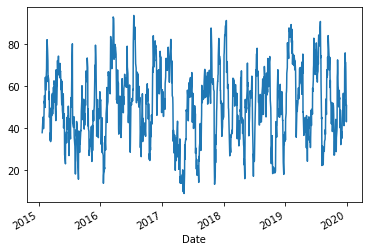

In [99]:
stock_data['RSI'].plot()